<a href="https://colab.research.google.com/github/Msurya-05/surya/blob/main/day2_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#NOISE SPIKES DETECTION IN OSCILLOSCOPE WAVE FORMS # Import necessary libraries
import cv2 # OpenCV library for computer vision tasks
import numpy as np # NumPy library for numerical operations, especially array handling
import matplotlib.pyplot as plt # Matplotlib's pyplot module for plotting and visualization

In [5]:
# Import necessary modules for file uploading
from google.colab import files # Module to handle file uploads in Google Colab
import io # Core tools for working with streams

# Upload files from your local system
uploaded = files.upload()

# Process each uploaded file
for fn in uploaded.keys():
  # Print information about the uploaded file
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  # Read image from bytes
  img_bytes = uploaded[fn] # Get the file content as bytes
  img = cv2.imdecode(np.frombuffer(img_bytes, np.uint8), cv2.IMREAD_COLOR) # Decode the image from bytes into a OpenCV color image (BGR format)

# Now 'img' variable holds the uploaded image and can be used for further processing
# You can proceed with your existing code using 'img'

Saving 159718352-a21c41b8-eb96-4937-995b-d9962759d2f5.png to 159718352-a21c41b8-eb96-4937-995b-d9962759d2f5.png
User uploaded file "159718352-a21c41b8-eb96-4937-995b-d9962759d2f5.png" with length 41427 bytes


In [3]:
# Load and process the image
# img = cv2.imread('waveform.jpg') # Load the image from a file (commented out as we are using uploaded image)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # Convert the image from BGR color to grayscale
blurred = cv2.GaussianBlur(gray, (5,5), 0) # Apply Gaussian blur to the grayscale image to reduce noise. Kernel size is 5x5.
thresh = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, # Apply adaptive thresholding to create a binary image
                                 cv2.THRESH_BINARY_INV, 11, 3) # Pixels are set to 255 (white) if their value is below the calculated threshold, and 0 (black) otherwise (inverted binary)
# cv2.ADAPTIVE_THRESH_GAUSSIAN_C: threshold value is a weighted sum of neighborhood values where weights are a Gaussian window.
# 11: blockSize - size of a pixel neighborhood that is used to calculate a threshold value.
# 3: C - constant subtracted from the mean or weighted mean.

In [4]:
# Find contours that could represent noise or peaks
# cv2.findContours finds contours in the binary image.
# thresh: Source image (binary).
# cv2.RETR_EXTERNAL: Retrieval mode retrieves only the extreme outer contours.
# cv2.CHAIN_APPROX_SIMPLE: Contour approximation method compresses horizontal, vertical, and diagonal segments and leaves only their end points.
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# Create a copy of the original image to draw contours on
output = img.copy()

In [6]:
# Filter and draw only those contours with high curvature (e.g. noise)
for cnt in contours: # Iterate through each detected contour
    area = cv2.contourArea(cnt) # Calculate the area of the contour
    if 50 < area < 1000:  # Check if the contour area is within a specified range (adjust thresholds as needed)
        cv2.drawContours(output, [cnt], -1, (0,0,255), 2) # Draw the contour on the output image in red color (0,0,255) with a thickness of 2

(np.float64(-0.5), np.float64(756.5), np.float64(472.5), np.float64(-0.5))

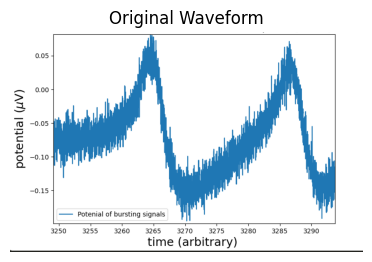

In [7]:
# Show result
# plt.figure(figsize=(10,5)): Creates a new figure for plotting with a specified size.
plt.figure(figsize=(10,5))
# plt.subplot(1,2,1): Creates a subplot in a 1x2 grid, and selects the first plot.
plt.subplot(1,2,1)
# plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)): Displays the original image in the subplot after converting it to RGB format.
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
# plt.title("Original Waveform"): Sets the title of the subplot.
plt.title("Original Waveform")
# plt.axis('off'): Turns off the axis labels and ticks.
plt.axis('off')

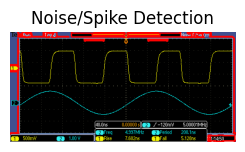

In [8]:
# This code snippet displays the processed image with the detected noise and spikes.

# plt.subplot(1,2,2): This creates a subplot within a 1x2 grid of plots. The 2 indicates that this is the second plot in the grid.
plt.subplot(1,2,2)
# plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB)): This displays the output image, which is the original image with contours drawn around the detected noise/spikes. cv2.cvtColor(output, cv2.COLOR_BGR2RGB) is used to convert the image from OpenCV's BGR color format to Matplotlib's RGB format for correct display.
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
# plt.title("Noise/Spike Detection"): This sets the title of the subplot to "Noise/Spike Detection".
plt.title("Noise/Spike Detection")
# plt.axis('off'): This turns off the axis labels and ticks for the plot.
plt.axis('off')
# plt.show(): This displays the generated plot.
plt.show()